In [1]:
import pandas as pd
import os
import collections
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse
from nltk.stem import SnowballStemmer

Reading json files

In [3]:
# Pasta onde os arquivos extraídos serão gravados
target_path =  '\\Users\\upe2\\OneDrive - PETROBRAS\\Documents\\Repositorios\\GeoscienceCorpus\\corpus'

name_files = ["JSG-Fault",  #Structural Fault Domain and 
              "TecPhy-Fault",  #Structural fault with tectonics domain
              "MPG_Fault", "IJRMMS_Fault", "OGR_Fault",  #Fault Industry 
              "JSG", "MPG", "IJRMMS", "OGR", "TecPhy",   #Strctural geology + industry geology + tectonics in general
              "MG", "SG", "OERG", "EG",  #Geology Domain
              "JPSE", "GF", "GEE", "ESR", "EPSL", "JG", "CG", "PS",   #Geoscience + Environment + Industry
              "AcademicEnglish_JAR_1", "AcademicEnglish_JAR_2", "AcademicEnglish_JAR_3", "AcademicEnglish_Heliyon_1", "AcademicEnglish_Heliyon_2"]  #Everything English 


articles = pd.DataFrame()

for name_file in name_files:

    arquivo_saida = os.path.join(target_path, name_file+ ".json")
    df_saída = pd.read_json(arquivo_saida)
    df_saída['Journal'] = name_file
    articles = articles.append(df_saída)
    
# Deleting articles without abstract
articles = articles[articles['Abstract'] != '']    
articles = articles.reset_index(drop=True)
articles

C:\Users\upe2\AppData\Local\Temp\ipykernel_20688\1383961081.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  articles = articles.append(df_saída)
C:\Users\upe2\AppData\Local\Temp\ipykernel_20688\1383961081.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  articles = articles.append(df_saída)
C:\Users\upe2\AppData\Local\Temp\ipykernel_20688\1383961081.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  articles = articles.append(df_saída)
C:\Users\upe2\AppData\Local\Temp\ipykernel_20688\1383961081.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  articles = articles.append(df_saída)
C:\Users\upe2\AppData\Local\Temp\ipykernel_2

,DOI,Title,Abstract,Text,Creator,Date,Keywords,SCOPUS_ID,Journal
0,10.1016/j.jsg.2022.104707,Laramide contractional folding in the Devils R...,\n Structures in Cretaceous s...,\n\n1\nIntroduction\nThe Cretaceous Eagle Ford...,"[Ferrill, David A., Smart, Kevin J., Evans, Ma...",2022-10-31,"[Contractional folding, Laramide deformation, ...",85137164855,JSG-Fault
1,10.1016/j.jsg.2022.104711,Evidence for Triassic contractional tectonics ...,\n The occurrence of Middle T...,,"[Carminati, Eugenio, Doglioni, Carlo]",2022-10-31,"[Triassic, Folding, Thrusting dolomites, Olist...",85137028252,JSG-Fault
2,10.1016/j.jsg.2022.104709,Strain localization at brittle-ductile transit...,\n Feldspar dominates the mid...,,"[Zuza, Andrew V., Cao, Wenrong, Rodriguez-Arri...",2022-10-31,"[Basin and Range, Brittle-ductile transition, ...",85137013302,JSG-Fault
3,10.1016/j.jsg.2022.104706,Inferring friction and stress states from the ...,\n Wing fractures and solutio...,,"[Lee, Hunjoo P., Schultz, Richard A., Olson, J...",2022-09-30,"[Tensile wing fracture, Solution surface, Kink...",85136570832,JSG-Fault
4,10.1016/j.jsg.2022.104703,Kinematics of fault-propagation folding: Analy...,\n Fault-propagation folding ...,,"[Plotek, Berenice, Heckenbach, Esther, Brune, ...",2022-09-30,"[Fault-propagation folds, Trishear kinematics,...",85136566881,JSG-Fault
...,...,...,...,...,...,...,...,...,...
5242,10.1016/j.heliyon.2021.e08504,Psychology students' attitudes towards researc...,\n The current study aimed to...,\n\n1\nIntroduction\nAttitudes are defined as ...,"[Landa-Blanco, Miguel, Cortés-Ramos, Antonio]",2021-12-31,"[Scientific attitudes, Critical thinking, Epis...",85120634796,AcademicEnglish_Heliyon_2
5243,10.1016/j.heliyon.2021.e08509,"Streamflow and sediment yield estimation, and ...",\n Estimating sediment yield ...,\n\n1\nIntroduction\nEffectual design of struc...,"[Roba, Negash Tessema, Kassa, Asfaw Kebede, Ge...",2021-12-31,"[Streamflow, Sediment yield, SWAT model, BMP, ...",85120633786,AcademicEnglish_Heliyon_2
5244,10.1016/j.heliyon.2021.e08493,Immunomodulatory effects of black solo garlic ...,\n Diabetes mellitus is a chr...,\n\n1\nIntroduction\nDiabetes mellitus (DM) is...,"[Saryono, , Nani, Desiyani, Proverawati, Atika...",2021-12-31,[\n Allium sativum\n ...,85120633224,AcademicEnglish_Heliyon_2
5245,10.1016/j.heliyon.2021.e08466,Khat (Catha Edulis Forsk) induced apoptosis an...,\n Background\n ...,\n\n1\nIntroduction\nKhat (Catha edulis Forsk)...,"[Al-Qadhi, Gamilah, Ali Mohammed, Marwan Manso...",2021-12-31,"[Apoptosis, Catha edulis, Cytotoxicity, Khat e...",85120630895,AcademicEnglish_Heliyon_2


In [21]:
#"AcademicEnglish_JAR_1" = 496
#"AcademicEnglish_JAR_2" = 23
#"AcademicEnglish_JAR_3" = 38
#"AcademicEnglish_Heliyon_1" = 992 
#"AcademicEnglish_Heliyon_2" = 990
articles[articles['Journal'] == 'JSG-Fault']
900 + 480 + 960 + 1982 + 557

4879

Keywords analysis

In [3]:
# Lowercase all keywords
articles['Keywords'] = articles['Keywords'].apply(lambda x: ([w.lower() for w in x]))

Histogram with number of keywords per article

<AxesSubplot:ylabel='Frequency'>

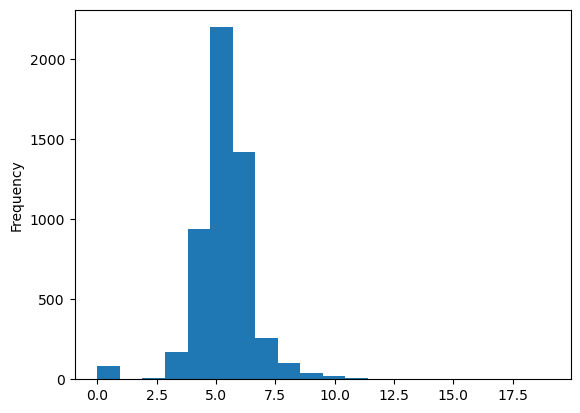

In [4]:
articles['Keywords'].str.len().plot.hist(bins=20)

<AxesSubplot:xlabel='Date'>

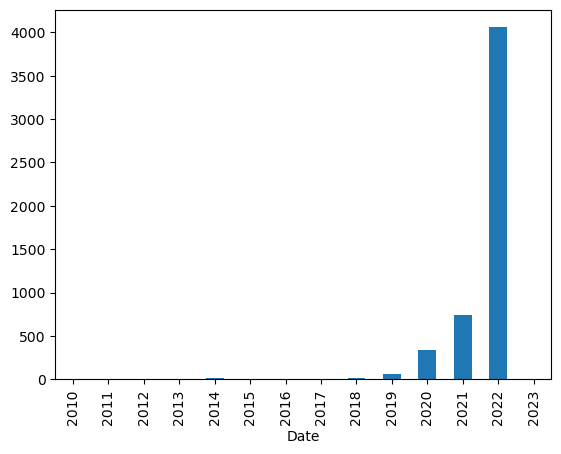

In [5]:
#set(articles['Date'])
articles['Date'].groupby(articles['Date'].dt.year).count().plot(kind="bar")

In [6]:
# All keyword in a single list
key = []
for k in articles['Keywords']:
    key = key + k
    
# Count how many times a keyword was mentioned
counter = collections.Counter(key)

# Sort keywords and print the 1% higher frequency
counter_sorted_keys = sorted(counter, key=counter.get, reverse=True)
for r in counter_sorted_keys[:int(len(counter_sorted_keys)/100)]:
    if counter[r] < 20:
        break
    print(r, counter[r])

covid-19 138
machine learning 47
climate change 34
ethiopia 33
sars-cov-2 32
numerical simulation 30
permeability 27
deep learning 27
numerical modelling 26
diagenesis 26
fluid flow 24
depression 24
numerical modeling 23
induced seismicity 23
bangladesh 23
earthquakes 22
geochronology 22
sequence stratigraphy 22
geochemistry 22
oxidative stress 22
optimization 21
earthquake 20
seismic hazard 20
tibetan plateau 20
north china craton 20
adsorption 20
mental health 20
anxiety 20


Function to steamm the text (cutting the inflexion of the words)

In [7]:
snow = SnowballStemmer('english')

def SnowballStem(text):
    stemmed_sentence = []
    # Word Tokenizer
    words = word_tokenize(text)
    for w in words:
        # Apply Stemming
        stemmed_sentence.append(snow.stem(w))
    stemmed_text = " ".join(stemmed_sentence)

    return(stemmed_text)

In [8]:
articles['Abstract'] = articles['Abstract'].apply(lambda x: SnowballStem(x))

# Creating the TF-IDF vectors using all corpora

In [75]:
# Selectin abstract corpus
corpus = articles['Abstract'].values
# Vectorizing using Tf x Idf, ngram_range, and extracting english stopwords and 
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(3,3))
TfIdf = vectorizer.fit_transform(corpus)

### Selecting a specific corpus

In [76]:
#Structural Fault Domain
#Index of articles of the specific domain
#IDX = articles[articles['Journal'] == 'JSG-Fault'].index


#Structural fault with tectonics domain
#Index of articles of the specific domain
#IDX = articles[(articles['Journal'] == 'JSG-Fault') | 
#               (articles['Journal'] == 'TecPhy-Fault')].index


#Fault Industry (Petroleum,Mining, etc)
#Index of articles of the specific domain
#IDX = articles[(articles['Journal'] == "MPG_Fault") | 
#               (articles['Journal'] == "IJRMMS_Fault") |
#               (articles['Journal'] == "OGR_Fault")].index


#Structural fault with tectonics and fault industry domain
#Index of articles of the specific domain
#IDX = articles[(articles['Journal'] == 'JSG-Fault') | 
#               (articles['Journal'] == 'TecPhy-Fault') |
#               (articles['Journal'] == "MPG_Fault") | 
#               (articles['Journal'] == "IJRMMS_Fault") |
#               (articles['Journal'] == "OGR_Fault")].index


#Structural geology + industry geology + tectonics in general
#Index of articles of the specific domain
#IDX = articles[(articles['Journal'] == "JSG") | 
#               (articles['Journal'] == "MPG") |
#               (articles['Journal'] == "IJRMMS") |
#               (articles['Journal'] == "OGR") |
#               (articles['Journal'] == "TecPhy")].index


#Geology Domain
#Index of articles of the specific domain
#IDX = articles[(articles['Journal'] == "JSG") | 
#               (articles['Journal'] == "MPG") |
#               (articles['Journal'] == "IJRMMS") |
#               (articles['Journal'] == "OGR") |
#               (articles['Journal'] == "TecPhy") |
#               (articles['Journal'] == "MG") |
#               (articles['Journal'] == "SG") |
#               (articles['Journal'] == "OERG") |
#               (articles['Journal'] == "EG")].index


#Geoscience + Environment + Industry
#Index of articles of the specific domain
#IDX = articles[(articles['Journal'] == "JSG") | 
#               (articles['Journal'] == "MPG") |
#               (articles['Journal'] == "IJRMMS") |
#               (articles['Journal'] == "OGR") |
#               (articles['Journal'] == "TecPhy") |
#               (articles['Journal'] == "MG") |
#               (articles['Journal'] == "SG") |
#               (articles['Journal'] == "OERG") |
#               (articles['Journal'] == "EG") |
#               (articles['Journal'] == "JPSE") |
#               (articles['Journal'] == "GF") |
#               (articles['Journal'] == "GEE") |
#               (articles['Journal'] == "ESR") |
#               (articles['Journal'] == "EPSL") |
#               (articles['Journal'] == "JG") |
#               (articles['Journal'] == "CG") |
#               (articles['Journal'] == "PS")].index


# Academic English
IDX = articles.index

#TF x IDF vectors of articles of the domain
TfIdf_domain = TfIdf[IDX]

In [77]:
corpus_size = TfIdf_domain.shape[0]
voc_size = TfIdf_domain.shape[1]

print ("Number of paper of the domain corpus: ", corpus_size)

# Sum the TF x Idf vectors for all abstracts
sum_TfIdf_domain = sparse.csr_matrix((1, voc_size))

for i in range(corpus_size):
    sum_TfIdf_domain = sum_TfIdf_domain + TfIdf_domain[i]

Number of paper of the domain corpus:  5247


Sorting the summed TC x Idf vector

In [78]:
def sort_coo(m):
    tuples = zip(m.data, m.indices)
    return sorted(tuples, key=lambda x: (x[0], x[1]), reverse = True)

sum_TfIdf_domain = sort_coo(sum_TfIdf_domain)

In [80]:
max_print = 500

n = 0
for i in sum_TfIdf_domain:
    #print('Summed Tf x Idf: ', i[0], ' Term: ', vectorizer.get_feature_names_out()[i[1]])
    print(i[0])
    #print(vectorizer.get_feature_names_out()[i[1]])
    n = n + 1
    if n >= max_print:
        break

9.609872200572028
7.051654145740703
5.864379017702366
4.164235408845306
4.0171537003641475
3.8894135514169808
3.6836323711146175
3.492207901219298
3.152040049219992
3.1285307256689068
3.0028706116878277
2.923662098232674
2.818126980014926
2.638564972555898
2.5549419738392096
2.523206000776583
2.4662813912118935
2.4477285270967166
2.33894014047588
2.22290552783869
2.218148844847328
2.068952703461167
2.0538663012025484
1.9005724136775028
1.8918173225578792
1.857007626361092
1.8460963002270232
1.832121247623111
1.8279810148752635
1.7975925653080798
1.7948608947179072
1.7917565359412895
1.7579749415884216
1.7422671696524592
1.6925759890722039
1.6924702806473568
1.6882363197621222
1.681143207527908
1.6552993971263568
1.6550641230466028
1.6542913918450717
1.653461048793237
1.649890296562107
1.6238928870898857
1.604232833923378
1.603786954112122
1.5986288214667705
1.598044104847854
1.5973987409371417
1.5927157529250973
1.5894312679730098
1.5811662654098457
1.576483250709885
1.553293795953022


### Keywords of the damain

In [15]:
# All keyword in a single list
key = []
for k in articles.loc[IDX]['Keywords']:
    key = key + k
    
# Count how many times a keyword was mentioned
counter = collections.Counter(key)

# Sort keywords and print the 1% higher frequency
counter_sorted_keys = sorted(counter, key=counter.get, reverse=True)
n=0
for r in counter_sorted_keys:   # [:int(len(counter_sorted_keys)/100)]:
    #if counter[r] < 10:
    #    break
    n = n + 1
    if n > max_print:
        break
    
    print(r)#print(r, counter[r])
   

fault reactivation
fault
induced seismicity
fluid flow
earthquakes
earthquake
faults
fluid inclusions
seismic hazard
numerical modeling
damage zone
inversion tectonics
seismicity
salt tectonics
analogue modelling
tarim basin
numerical simulation
bohai bay basin
rifting
tibetan plateau
north china craton
paleoseismology
paleostress
strain partitioning
fracture
fold-and-thrust belt
fractures
structural inheritance
transpression
magnetotellurics
numerical modelling
brittle deformation
pseudotachylyte
normal faults
strike-slip faults
strike-slip fault
strike-slip
active tectonics
thermochronology
fluid inclusion
fracture network
strain localization
andes
kinematic analysis
fault zone
anisotropy of magnetic susceptibility
slip rate
inversion
south china
stress
